<a href="https://colab.research.google.com/github/pankaj18/tensorflow_for_ml_and_dl/blob/master/human_horse_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline

# Download Dataset

In [3]:
ls

'horse2 (1).jpg'   'huamn5 (1).jpg'         'human_horse (1).jpg'
 horse2.jpg        'huamn5 (2).jpg'          human_horse_1.jpg
'horse_3 (1).jpg'   huamn5.jpg              'human_horse (2).jpg'
 horse_3.jpg        human1.jpg               human_horse.jpg
'huamn2 (1).jpg'    human4.jpg               sample_data/
 huamn2.jpg        'human_horse_1 (1).jpg'
 huamn3.jpg        'human_horse_1 (2).jpg'


In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-04-19 17:51:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  61.1MB/s    in 2.3s    

2020-04-19 17:51:15 (61.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-04-19 17:51:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2020-04-19 17:51:17 (123 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [6]:
ls /tmp

horse-or-human/     __pycache__/    tmpfgo9xvhc.py
horse-or-human.zip  tmpcmzbk0mz.py  validation-horse-or-human.zip


In [0]:
#!unzip /tmp/horse-or-human.zip -d /tmp/

In [0]:
import os
import zipfile
local_zip="/tmp/horse-or-human.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [9]:
ls /tmp/

horse-or-human/     tmpcmzbk0mz.py              validation-horse-or-human.zip
horse-or-human.zip  tmpfgo9xvhc.py
__pycache__/        validation-horse-or-human/


In [0]:
train_horse_dir="/tmp/horse-or-human/horses/"
train_human_dir="/tmp/horse-or-human/humans/"
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [0]:
train_horse_files=os.listdir(train_horse_dir)
train_human_files=os.listdir(train_human_dir)
validation_horse_files = os.listdir(validation_horse_dir)
validation_human_files = os.listdir(validation_human_dir)

In [12]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [13]:
train_horse_files[0]

'horse48-7.png'

In [0]:
import matplotlib.image as mpimage
plt.style.use('dark_background')
plt.figure(figsize=(20,5))
for i in range(1,11):
  plt.subplot(1,10,i)
  img=mpimage.imread(os.path.join(train_horse_dir,train_horse_files[i]))
  plt.imshow(img)
  plt.axis('off')
  plt.tight_layout()

In [0]:
plt.figure(figsize=(20,5))
for i in range(1,11):
  plt.subplot(1,10,i)
  img=mpimage.imread(os.path.join(train_human_dir,train_human_files[i]))
  plt.imshow(img)
  plt.axis('off')
  plt.tight_layout()

In [0]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_files[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_files[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimage.imread(img_path)
  plt.imshow(img)

plt.show()


In [15]:
img=mpimage.imread(os.path.join(train_horse_dir,train_horse_files[1]))
img.shape

(300, 300, 4)

# Craete CNN Model for Human Horse classification

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),input_shape=(300,300,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

# Creating Data Generator

In [19]:
#from tf.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#all images rescaled by 255
train_datagen=ImageDataGenerator(rescale=1/255.0)
#flow training images in batches of 128
# since we are using binary crossentropy loss we need binary labels
train_generator=train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
    

Found 1027 images belonging to 2 classes.


In [20]:
1027/128

8.0234375

# Training without validation

In [21]:
model.fit(train_generator,epochs=15,steps_per_epoch=8,verbose=1)

Epoch 1/15
8/8 [==============================] - 5s 686ms/step - loss: 4.3076 - accuracy: 0.5576
Epoch 2/15
8/8 [==============================] - 6s 776ms/step - loss: 0.5968 - accuracy: 0.6941
Epoch 3/15
8/8 [==============================] - 5s 677ms/step - loss: 0.3808 - accuracy: 0.8242
Epoch 4/15
8/8 [==============================] - 5s 677ms/step - loss: 0.2864 - accuracy: 0.8576
Epoch 5/15
8/8 [==============================] - 6s 691ms/step - loss: 0.2775 - accuracy: 0.8854
Epoch 6/15
8/8 [==============================] - 5s 677ms/step - loss: 0.0864 - accuracy: 0.9689
Epoch 7/15
8/8 [==============================] - 5s 675ms/step - loss: 0.0499 - accuracy: 0.9800
Epoch 8/15
8/8 [==============================] - 5s 685ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 9/15
8/8 [==============================] - 5s 678ms/step - loss: 0.0885 - accuracy: 0.9544
Epoch 10/15
8/8 [==============================] - 6s 777ms/step - loss: 0.0617 - accuracy: 0.9775
Epoch 11/15
8/8 [==

# Checking images other than training set

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving human_horse_1.jpg to human_horse_1 (2).jpg
Saving human_horse.jpg to human_horse (2).jpg
Saving huamn5.jpg to huamn5 (2).jpg
Saving horse2.jpg to horse2 (1).jpg
[0.]
human_horse_1.jpg is a horse
[0.]
human_horse.jpg is a horse
[1.]
huamn5.jpg is a human
[1.]
horse2.jpg is a human


# Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


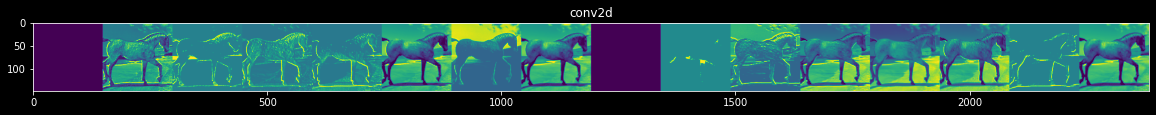

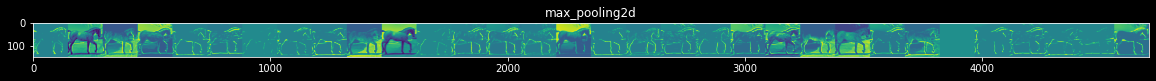

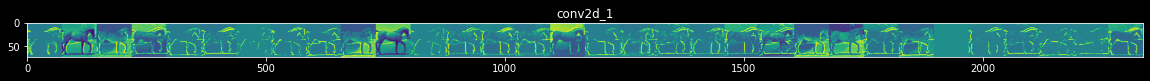

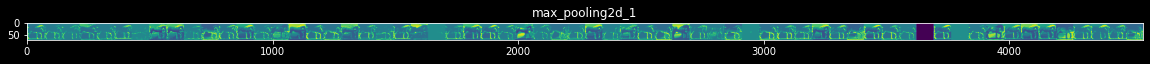

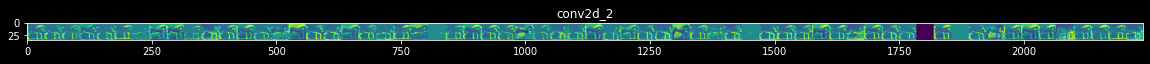

In [28]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_files]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_files]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Clean Up
run the following cell to terminate the kernel and free memory resources:

In [0]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)

# Training with validation dataset

In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

# Building a Small Model from Scratch for compressed image

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)